## Step1: Importing the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Step2: Creating & Reading the data

In [3]:
df = pd.read_csv(r'Pokemon1.csv', header=0,index_col=0)
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


## Step3: Understand the problem statement and the data, try understanding importance of each variable given.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 1 to 151
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       151 non-null    object
 1   Type 1     151 non-null    object
 2   Type 2     67 non-null     object
 3   Total      151 non-null    int64 
 4   HP         151 non-null    int64 
 5   Attack     151 non-null    int64 
 6   Defense    151 non-null    int64 
 7   Sp. Atk    151 non-null    int64 
 8   Sp. Def    151 non-null    int64 
 9   Speed      151 non-null    int64 
 10  Stage      151 non-null    int64 
 11  Legendary  151 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 14.3+ KB


In [6]:
df.shape

(151, 12)

In [7]:
df.describe(include='all')

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
count,151,151,67,151.00000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151
unique,151,15,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,Snorlax,Water,Poison,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,1,28,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,147
mean,NaN,NaN,NaN,407.07947,64.211921,72.549669,68.225166,67.139073,66.019868,68.933775,1.582781,NaN
std,NaN,NaN,NaN,99.74384,28.590117,26.596162,26.916704,28.534199,24.197926,26.746880,0.676832,NaN
min,NaN,NaN,NaN,195.00000,10.000000,5.000000,5.000000,15.000000,20.000000,15.000000,1.000000,NaN
25%,NaN,NaN,NaN,320.00000,45.000000,51.000000,50.000000,45.000000,49.000000,46.500000,1.000000,NaN
50%,NaN,NaN,NaN,405.00000,60.000000,70.000000,65.000000,65.000000,65.000000,70.000000,1.000000,NaN
75%,NaN,NaN,NaN,490.00000,80.000000,90.000000,84.000000,87.500000,80.000000,90.000000,2.000000,NaN


## Step4. Check if there are missing values. If yes, handle them.

In [8]:
df.isna().sum()

Name          0
Type 1        0
Type 2       84
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Stage         0
Legendary     0
dtype: int64

### Dropping the column "Type 2" because it has more than 50% null values. 

In [12]:
df.drop(['Type 2'], axis = 1, inplace=True)

In [13]:
df.head()

,Name,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,
1,Bulbasaur,Grass,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,405,58,64,58,80,65,80,2,False


In [50]:
df.Defense.max()

180

### Check if there are any special characters in place of values

In [14]:

for i in df.columns:
    print({i: df[i].unique()})

{'Name': array(['Bulbasaur', 'Ivysaur', 'Venusaur', 'Charmander', 'Charmeleon',
       'Charizard', 'Squirtle', 'Wartortle', 'Blastoise', 'Caterpie',
       'Metapod', 'Butterfree', 'Weedle', 'Kakuna', 'Beedrill', 'Pidgey',
       'Pidgeotto', 'Pidgeot', 'Rattata', 'Raticate', 'Spearow', 'Fearow',
       'Ekans', 'Arbok', 'Pikachu', 'Raichu', 'Sandshrew', 'Sandslash',
       'Nidoran‰ªÛ', 'Nidorina', 'Nidoqueen', 'Nidoran‰ªâ', 'Nidorino',
       'Nidoking', 'Clefairy', 'Clefable', 'Vulpix', 'Ninetales',
       'Jigglypuff', 'Wigglytuff', 'Zubat', 'Golbat', 'Oddish', 'Gloom',
       'Vileplume', 'Paras', 'Parasect', 'Venonat', 'Venomoth', 'Diglett',
       'Dugtrio', 'Meowth', 'Persian', 'Psyduck', 'Golduck', 'Mankey',
       'Primeape', 'Growlithe', 'Arcanine', 'Poliwag', 'Poliwhirl',
       'Poliwrath', 'Abra', 'Kadabra', 'Alakazam', 'Machop', 'Machoke',
       'Machamp', 'Bellsprout', 'Weepinbell', 'Victreebel', 'Tentacool',
       'Tentacruel', 'Geodude', 'Graveler', 'Golem', 'Ponyt

## Step5: To visualize the given data into graphical format

In [15]:
import warnings
warnings.filterwarnings("ignore")

### Scatter plots are useful to visualize the relationship between two continuous numerical variables

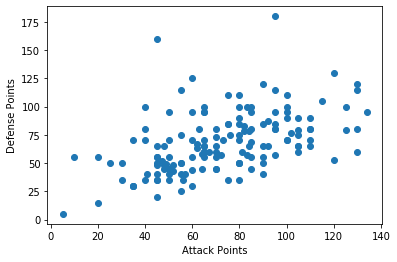

In [19]:
plt.scatter(data=df,x='Attack',y='Defense');
plt.xlabel('Attack Points')
plt.ylabel('Defense Points')
plt.show()

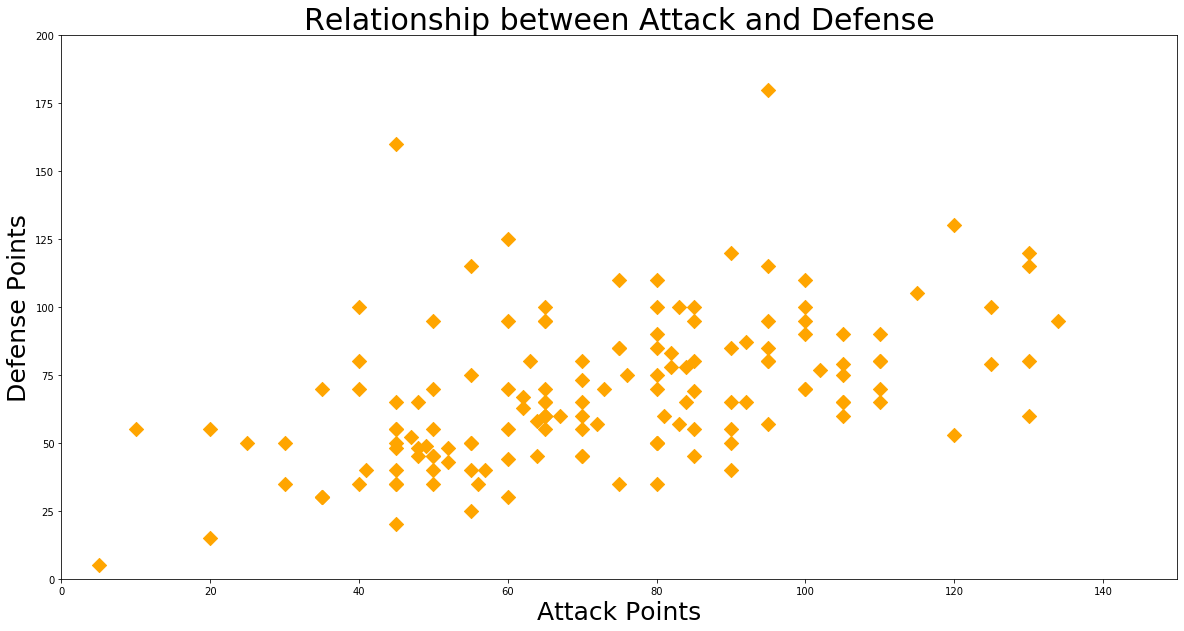

In [20]:
plt.figure(figsize=(20,10))
plt.scatter(data=df, x='Attack',y='Defense',s=100 , c='orange',marker='D')
#change axes ranges
plt.xlim(0,150)
plt.ylim(0,200)
#add title
plt.title('Relationship between Attack and Defense',size=30)
#add x and y labels
plt.xlabel('Attack Points',size=25)
plt.ylabel('Defense Points',size=25)
#plt.grid(True)
#show plot
#plt.savefig("test.jpg")
plt.show()

### Scatter plot with regression line

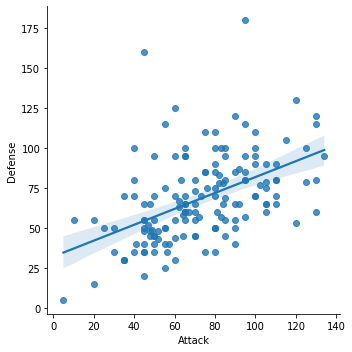

In [21]:
sns.lmplot(data=df,x='Attack',y='Defense');

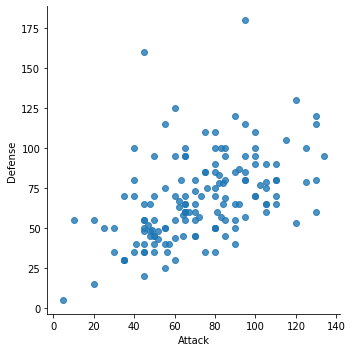

In [22]:
sns.lmplot(data=df,x='Attack',y='Defense',fit_reg=False);

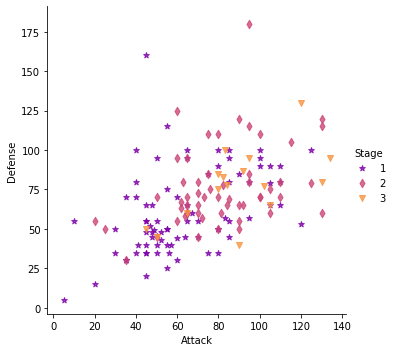

In [23]:
sns.lmplot(data=df, x='Attack',y='Defense',
          fit_reg=False, #No regression line
          hue='Stage',palette='plasma',markers=["*","d","v"])
plt.show()

In [24]:
df.Legendary.value_counts()

False    147
True       4
Name: Legendary, dtype: int64

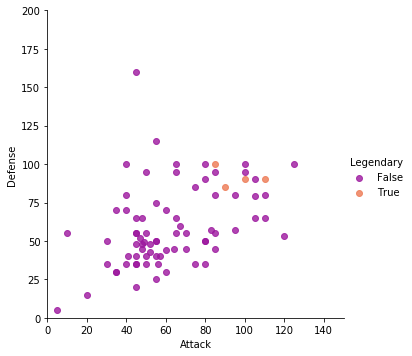

In [25]:
#conditional
#plt.figure(figsize=(30,20))
sns.lmplot(data=df[df["Stage"]==1],x='Attack',y='Defense',
          fit_reg=False, #No regression line
          hue='Legendary',palette='plasma')
plt.xlim(0,150)
plt.ylim(0,200)
#plt.grid(True)
plt.show()

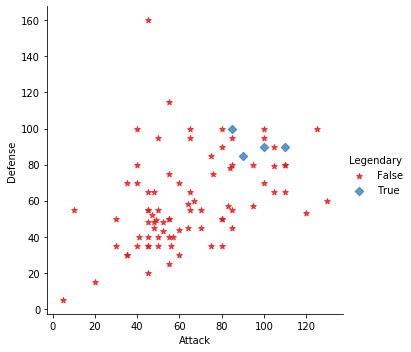

In [28]:
sns.lmplot(data=df[(df["Stage"]==1) | (df["Type 1"]=="Fire")], x='Attack',
           y='Defense',
           fit_reg=False, # No regression line
           hue='Legendary',palette="Set1",markers=["*","D"]);
plt.show()

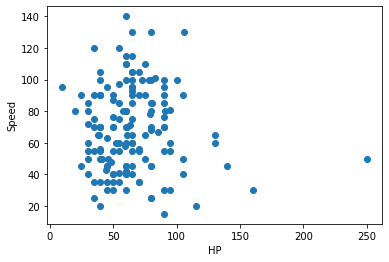

In [31]:
plt.scatter(data=df,x='HP',y='Speed');
plt.xlabel('HP')
plt.ylabel('Speed')
plt.show()

### Histograms are useful to visualize the frequency distribution of a single continuous variable

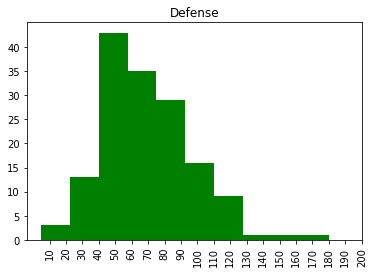

In [33]:
plt.hist(x="Defense",data=df, bins=10,color="green")
plt.title('Defense')
plt.xticks(np.arange(10,201,10),rotation=90)
# array from 0 to 200 with a increment value of 10
plt.yticks(np.arange(0,41,5));

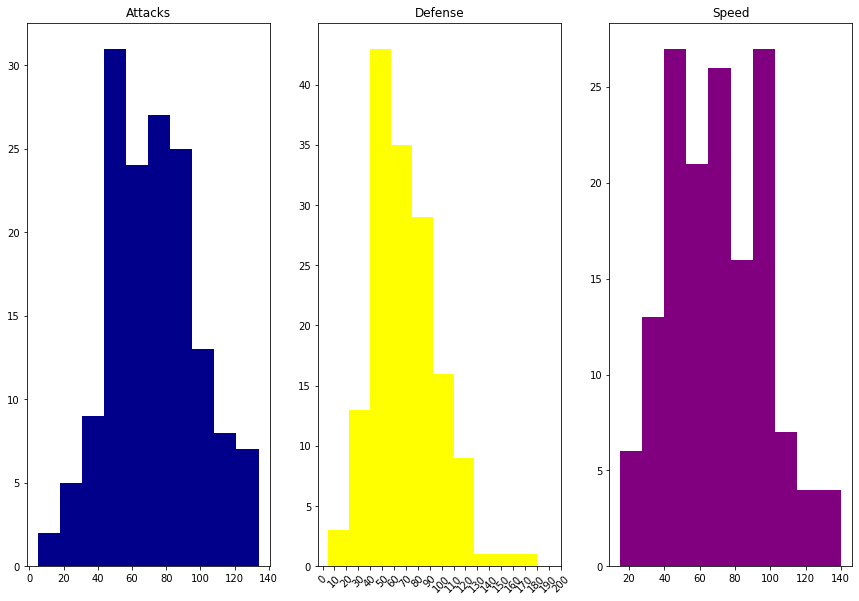

In [37]:
plt.figure(figsize=(20,10))
plt.subplot(141)
plt.hist(x="Attack",data=df, bins=10,color='darkblue')
plt.title('Attacks')

plt.subplot(142)
plt.hist(x="Defense",data=df, bins=10,color='yellow')
plt.title('Defense')
plt.xticks(np.arange(0,201,10),rotation=45)# array from 0 to 200 with a increment value of 10
plt.yticks(np.arange(0,41,5))

plt.subplot(143)
plt.hist(x="Speed",data=df, bins=10,color='purple')
plt.title('Speed')
plt.show()


### Pairplot is used for creating a matrix of scatterplots and histograms to visualize pairwise relationships in a dataset.

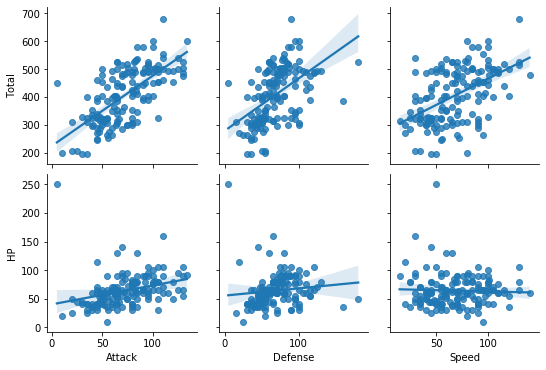

In [38]:
sns.pairplot(data=df,x_vars=["Attack","Defense","Speed"],
            y_vars=["Total","HP"],
            kind='reg');
plt.show()

### Countplot are useful to visualize the frequency distribution of a single discrete/categorical variable

In [40]:
df.Stage.value_counts()

1    79
2    56
3    16
Name: Stage, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

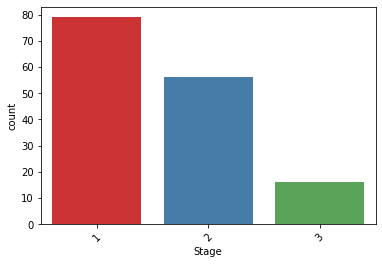

In [39]:
sns.countplot(x='Stage',data=df,palette="Set1")

#Rotate x-labels
plt.xticks(rotation=45);
plt.show

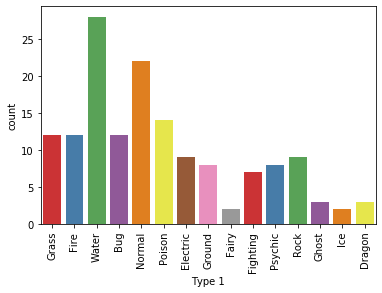

In [43]:
sns.countplot(x='Type 1',data=df,palette="Set1")

#Rotate x-labels
plt.xticks(rotation=90)
plt.show()

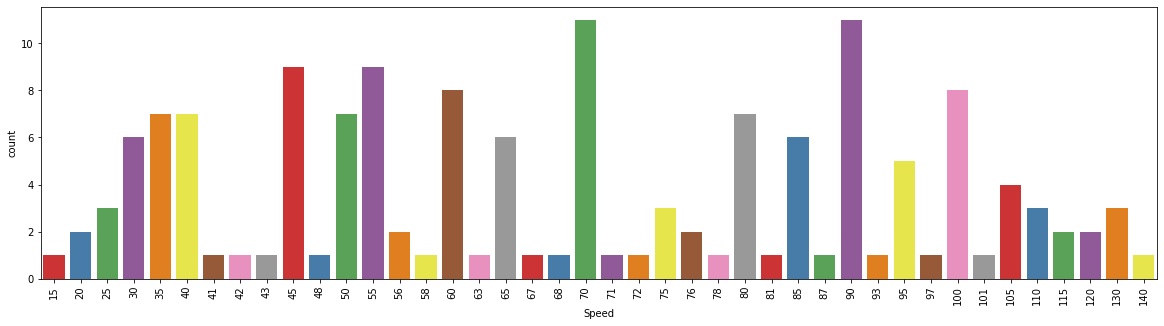

In [45]:
plt.figure(figsize=(20,5))
sns.countplot(x='Speed',data=df,palette="Set1")

#Rotate x-labels
plt.xticks(rotation=90)
plt.show()

## Conclusion

### In the given dataset we can see that most of the pokemon lies in the Stage 1 and have category of Water. The pokemon in Stage 2 have maximum defense(180) and attack(100) which is good as compare to others.